# Module 3 Homework - Seaborn
Using a dataset about Pokemon combat statistic, we will practice data visualization using the seaborn library.  
<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this notebook, we will plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fp = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"
pokemon_data = pd.read_csv(fp)

## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell :immediately following the plot to describe the relationship between Attack and Defense in this dataset.

Text(0.5, 1.05, 'Attack and Defense Of The Characters')

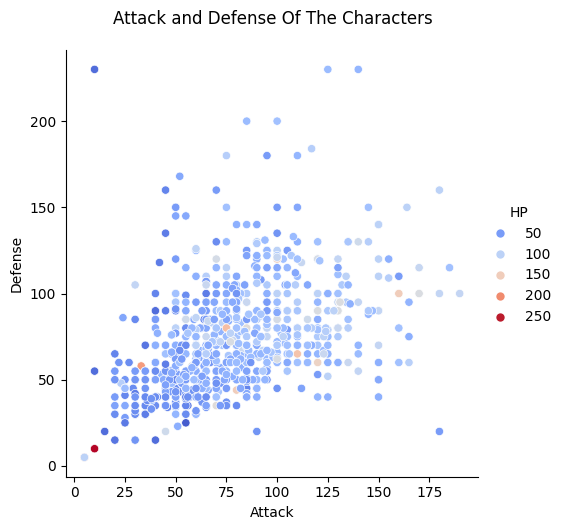

In [2]:
g = sns.relplot(
    data=pokemon_data,
    x="Attack",
    y="Defense",
    hue="HP",
    palette="coolwarm"
)
g.fig.suptitle("Attack and Defense Of The Characters", y =1.05)

From the plot, I observed that Pokemon with with higher `Attack` have less hp compared to those pokemon with lower `Attack`. There seems to correlation between `Attack` and `Defense` of the pokemon.



## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

Text(0.5, 1.03, 'Attack vs Total For All Pokemon')

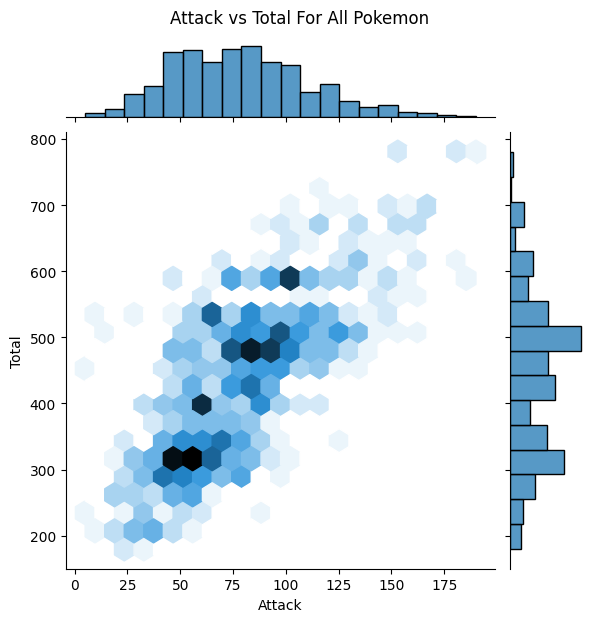

In [3]:
g2 = sns.jointplot(
    data=pokemon_data,
    x="Attack",
    y="Total",
    kind="hex",
    gridsize=20

)
g2.fig.suptitle("Attack vs Total For All Pokemon", y=1.03)

From the plot, I observed that most pokemon have `Attack` between 50 and 100. And most pokemon have `Total` between 400-550. There's a positive correlation between the `Attack` and `Total`, as the `Attack` increases, `Total` also gradually increases.


## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` .
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

Text(0.5, 1.0, 'Type 2 Pokemon Plot')

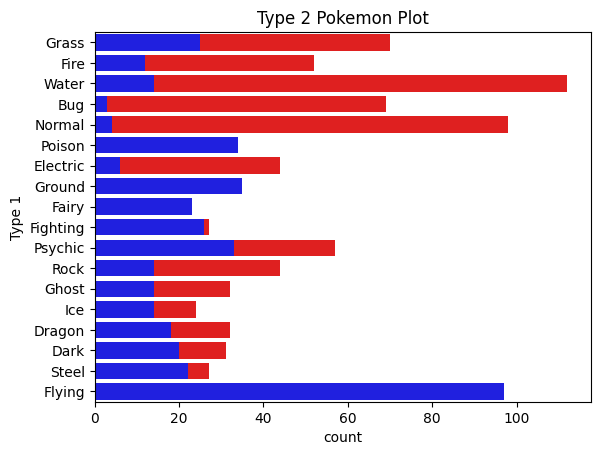

In [4]:


c1 = sns.countplot(
    data=pokemon_data,
    y='Type 1',
    color='red'
)
plt.title('Type 1 Pokemon Plot')


c2 = sns.countplot(
    data=pokemon_data,
    y='Type 2',
    color='blue'
)
plt.title('Type 2 Pokemon Plot')




## Q4: What was the range of the highest to lowest for `Attack` from each `Generation`?



/tmp/ipython-input-179/1316941501.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g3 = sns.violinplot(


Text(0.5, 1.0, 'Range of Attack by Generation')

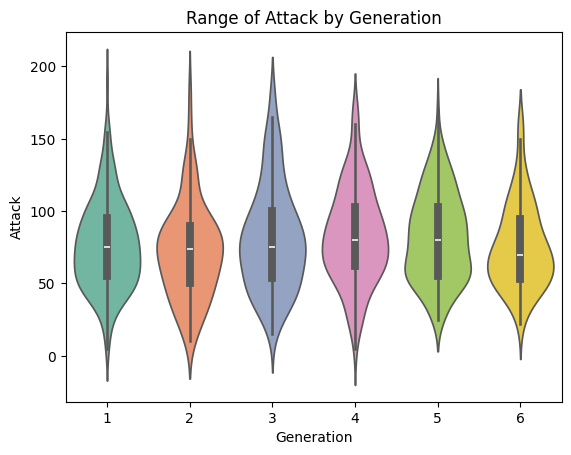

In [43]:
g3 = sns.violinplot(
    data=pokemon_data,
    x="Generation",
    y="Attack",
    palette="Set2",
)


plt.title("Range of Attack by Generation")




# pokemon_data.columns
# pokemon_data["Generation"].head(10)

From this figure, I noticed that across the generations, all of the Pokémon had similar attack range. There wasn't much difference between the Attack stats.




## Q5: Which `Generation` has the greatest Attack range, and does that range differ significantly between Legendary and non-Legendary Pokémon??



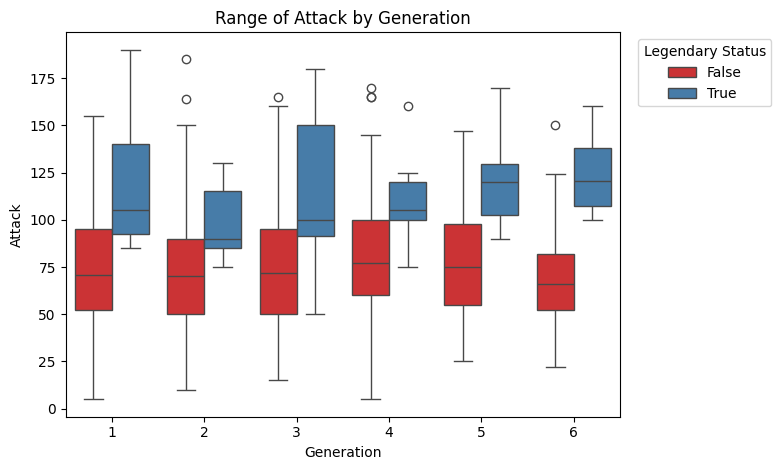

In [80]:
g3 = sns.boxplot(
    data=pokemon_data,
    x="Generation",
    y="Attack",
    hue="Legendary",
    palette="Set1"
)


plt.title("Range of Attack by Generation")
plt.tight_layout()

plt.legend(
    title="Legendary Status",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)



## Q6: Within each `Generation`, which primary `Type 1` has the highest average `Total` stat, and does that top-performing type differ between `Legendary` and Non-Legendary Pokémon?

In [81]:
pokemon_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

Text(0.5, 0.98, 'Average Total by Generation and Type 1')

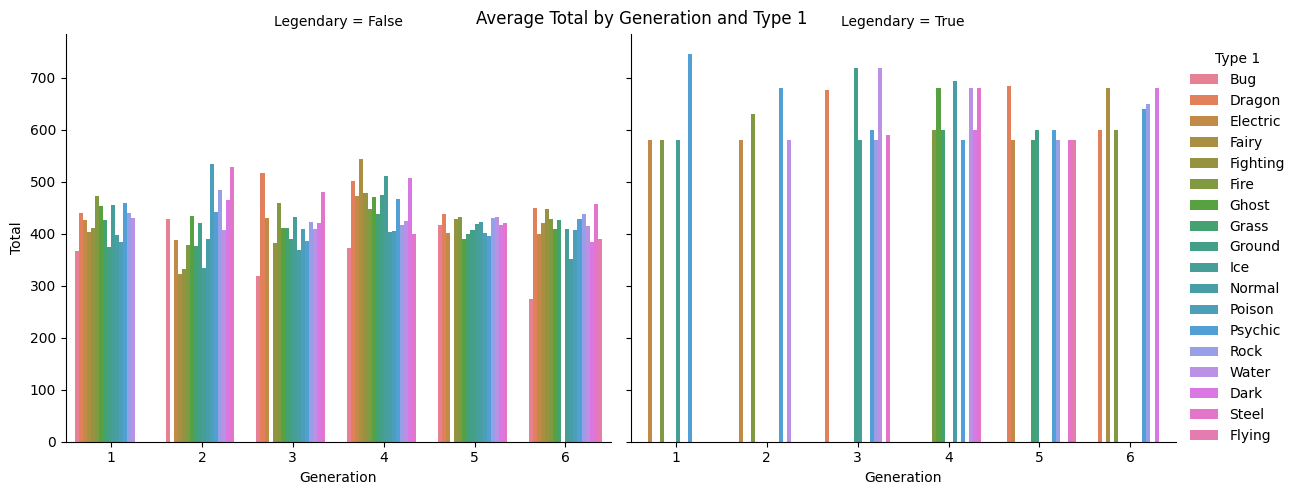

In [94]:
avg_from_each = pokemon_data.groupby(['Generation', 'Legendary', 'Type 1'])['Total'].mean().reset_index()
highest_avg = avg_from_each.loc[avg_from_each.groupby('Generation')['Total'].idxmax(), ['Legendary', 'Type 1', 'Generation', 'Total']]


g4 = sns.catplot(
    data=avg_from_each,
    x="Generation",
    y="Total",
    hue="Type 1",
    col="Legendary",
    kind="bar",
    height=5,
    aspect=1.2

)
g4.fig.suptitle("Average Total by Generation and Type 1")


# print(highest_avg)



From this plot, I noticed that Legendary pokemon had higher `Attack` average than non legendary pokemon. The psychic type pokemon seems to be the one with the highest stats.
